# SAFECAT works

The SAFECAT is the combined SPIRE Spectral Feature Finder Catalogue from _sparse_ and _mapping_ observations.

In [77]:
import os

from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

home = os.path.expanduser('~')
wdir = home + '/Dropbox/Work/featureFinder/FFv2'

In [89]:
t = Table.read('{}/CombinedCatalogue.fits'.format(wdir))
df = t.to_pandas()
nt = len(df)
# strip blanks in columns 'extent','calibration','sampling'
for icol in ['extent','calibration','sampling']:
    df[icol] = df[icol].map(lambda x: x.decode().strip())
#    
uxx, indices = np.unique(df.obsid, return_index=True)
#
print ("Total of {} features from {} different observations".format(nt,nobs))
isparse = np.where(df.sampling[indices] == 'sparse')[0]
ifull = np.where(df.sampling[indices] == 'full')[0]
iinter = np.where(df.sampling[indices] == 'intermediate')[0]
print ("    sparse: {}, full: {} and intermediate: {}".format(len(isparse),len(ifull),len(iinter)))

Total of 170227 features from 818 different observations
    sparse: 639, full: 54 and intermediate: 125


In [90]:
#
# check those at SNR > 5

n0 = len(np.where(np.abs(df.SNR) >= 5.0)[0])
print ("Total of {} features with |SNR| >= 5.0 ({:.1f} %)".format(n0,100*n0/nt))

Total of 167400 features with |SNR| >= 5.0 (98.3 %)


In [94]:
i5 = np.where(np.abs(df.SNR) < 5.0)[0]
print ("Total of {} features at SNR < 5, with mode".format(len(i5)),np.unique(df.sampling[i5]))
print ("From {} observations".format(len(np.unique(df.obsid[i5]))))

Total of 2827 features at SNR < 5, with mode ['full' 'intermediate']
From 160 observations


(array([   0.,    0.,    0.,    0.,    4.,    4.,   17.,  114.,  368.,
         736., 1584.]),
 array([-5.        , -4.09090909, -3.18181818, -2.27272727, -1.36363636,
        -0.45454545,  0.45454545,  1.36363636,  2.27272727,  3.18181818,
         4.09090909,  5.        ]),
 <a list of 11 Patch objects>)

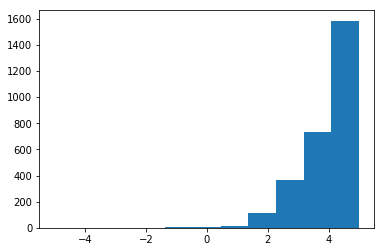

In [99]:
# the distribution of those with SNR < 5
plt.hist(df.SNR,range=(-5,5),bins=11)

/Users/ivaltcha/miniconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


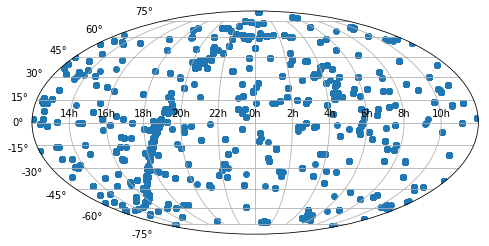

In [92]:
# plotting
ra = coord.Angle(df.ra.values*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df.dec.values*u.degree)
#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
